# import libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns

# Load Dataset

In [2]:
data=pd.read_csv('FraudCard.csv')
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# Description

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# Balanced dataset

In [5]:
data_bal = data[data['isFraud']==1].sample(n=5000)
data_bal = data_bal.append(data[data['isFraud']==0].sample(n=5000))
data_bal

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2123347,183,TRANSFER,355909.21,C1946400298,355909.21,0.00,C1340648788,0.00,0.00,1,0
6281779,650,TRANSFER,692654.27,C435003043,692654.27,0.00,C1552080163,0.00,0.00,1,0
6196334,573,TRANSFER,457789.14,C2120513600,457789.14,0.00,C975127788,0.00,0.00,1,0
5012385,353,CASH_OUT,839008.91,C46669034,839008.91,0.00,C1321957985,364600.35,1203609.26,1,0
6351059,696,TRANSFER,803038.11,C1481259935,803038.11,0.00,C749805705,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4539362,326,TRANSFER,1151053.30,C744735536,0.00,0.00,C884298272,3236040.12,4387093.42,0,0
3629691,274,CASH_OUT,471661.04,C300880760,0.00,0.00,C1075100696,729694.08,1201355.12,0,0
5173239,358,PAYMENT,12615.17,C208200959,862.00,0.00,M1594253104,0.00,0.00,0,0
1162365,132,PAYMENT,8686.06,C555092298,14905.00,6218.94,M1954610865,0.00,0.00,0,0


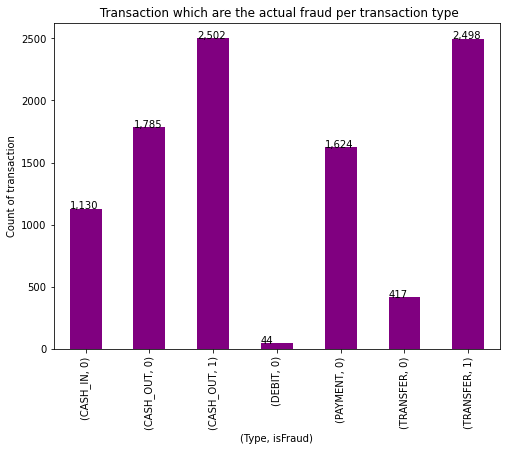

In [6]:
ax = data_bal.groupby(['type', 'isFraud']).size().plot(kind='bar',figsize=(8, 6), color='purple')
ax.set_title(" Transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

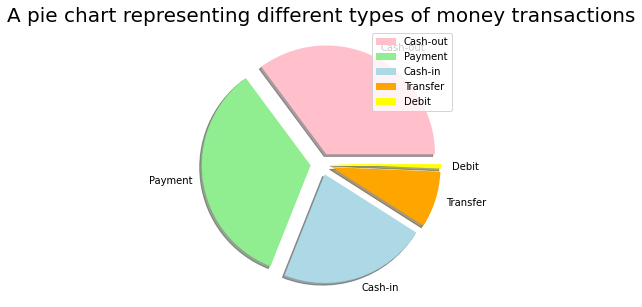

In [7]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# Feature selection

In [8]:
data1=data_bal.select_dtypes(include=['int64','float64'])
data1

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2123347,183,355909.21,355909.21,0.00,0.00,0.00,1,0
6281779,650,692654.27,692654.27,0.00,0.00,0.00,1,0
6196334,573,457789.14,457789.14,0.00,0.00,0.00,1,0
5012385,353,839008.91,839008.91,0.00,364600.35,1203609.26,1,0
6351059,696,803038.11,803038.11,0.00,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...
4539362,326,1151053.30,0.00,0.00,3236040.12,4387093.42,0,0
3629691,274,471661.04,0.00,0.00,729694.08,1201355.12,0,0
5173239,358,12615.17,862.00,0.00,0.00,0.00,0,0
1162365,132,8686.06,14905.00,6218.94,0.00,0.00,0,0


# data cleaning

In [9]:
Data_F=data1.drop(columns=['step'])

In [10]:
Data_F

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2123347,355909.21,355909.21,0.00,0.00,0.00,1,0
6281779,692654.27,692654.27,0.00,0.00,0.00,1,0
6196334,457789.14,457789.14,0.00,0.00,0.00,1,0
5012385,839008.91,839008.91,0.00,364600.35,1203609.26,1,0
6351059,803038.11,803038.11,0.00,0.00,0.00,1,0
...,...,...,...,...,...,...,...
4539362,1151053.30,0.00,0.00,3236040.12,4387093.42,0,0
3629691,471661.04,0.00,0.00,729694.08,1201355.12,0,0
5173239,12615.17,862.00,0.00,0.00,0.00,0,0
1162365,8686.06,14905.00,6218.94,0.00,0.00,0,0


In [11]:
Data_F.isna().sum()

amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
Data_F.duplicated().sum()

37

In [13]:
print('number of rows  before discarding duplicates = %d' % (Data_F.shape[0]))
datadub= Data_F.drop_duplicates()
print("number of rows after discarding duplicates = %d" % (datadub.shape[0]))

number of rows  before discarding duplicates = 10000
number of rows after discarding duplicates = 9963


In [14]:
datadub.isnull().values.any()

False

In [15]:
datadub

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2123347,355909.21,355909.21,0.00,0.00,0.00,1,0
6281779,692654.27,692654.27,0.00,0.00,0.00,1,0
6196334,457789.14,457789.14,0.00,0.00,0.00,1,0
5012385,839008.91,839008.91,0.00,364600.35,1203609.26,1,0
6351059,803038.11,803038.11,0.00,0.00,0.00,1,0
...,...,...,...,...,...,...,...
4539362,1151053.30,0.00,0.00,3236040.12,4387093.42,0,0
3629691,471661.04,0.00,0.00,729694.08,1201355.12,0,0
5173239,12615.17,862.00,0.00,0.00,0.00,0,0
1162365,8686.06,14905.00,6218.94,0.00,0.00,0,0


# EDA

In [16]:
datadub['isFraud'].value_counts()

0    5000
1    4963
Name: isFraud, dtype: int64

In [17]:
datadub['isFlaggedFraud'].value_counts()

0    9954
1       9
Name: isFlaggedFraud, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


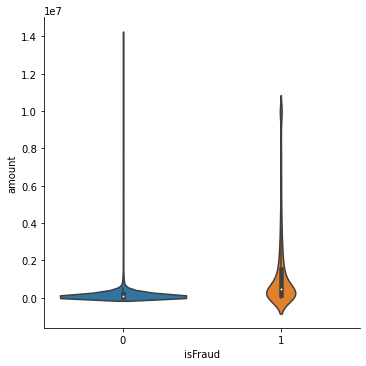

In [18]:
sns.factorplot(x ='isFraud', y ='amount',
               kind = 'violin', data = datadub)

# Modeling

In [19]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score,\
            f1_score, classification_report, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [20]:
x=datadub.drop(columns=['isFraud'])
y = datadub.isFraud

In [29]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6974, 6), (2989, 6), (6974,), (2989,))

In [31]:
clf = LogisticRegression(solver = 'lbfgs')

In [32]:
sm = SMOTE(random_state = 123)

In [33]:
X_train_new, y_train_new = sm.fit_resample(x_train, y_train.ravel())

In [34]:
len(X_train_new), len(y_train_new)

(7022, 7022)

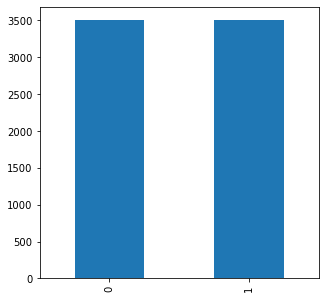

In [35]:
pd.Series(y_train_new).value_counts().plot.bar();

In [45]:
Log_Reg = LogisticRegression()

# Logistic Regression

In [46]:
clf = LogisticRegression(solver = 'lbfgs')
clf.fit(X_train_new, y_train_new)
test_pred_sm = clf.predict(x_test)

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score,\
            f1_score, classification_report, roc_auc_score, roc_curve
lr_test_accuracy = accuracy_score(test_pred_sm, y_test)
lr_test_f1_score = f1_score(y_test,test_pred_sm)
print('Accuracy of Logistic Regression is ', lr_test_accuracy * 100)
print('F1 score of Logistic Regression is ', lr_test_f1_score * 100)

Accuracy of Logistic Regression is  86.45031783205084
F1 score of Logistic Regression is  84.60661345496008


# Random Forest

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score,\
            f1_score, classification_report, roc_auc_score, roc_curve
RandomForest_model = RandomForestClassifier(random_state=2)

RandomForest_model.fit(X_train_new, y_train_new)
RandomForest_test_prediction = RandomForest_model.predict(x_test)
RandomForest_test_accuracy = accuracy_score(y_test, RandomForest_test_prediction)
RandomForest_test_f1_score = f1_score(y_test, RandomForest_test_prediction)

print('Accuracy of Random Forest is ', RandomForest_test_accuracy * 100)
print('F1 score of Random Forest is ', RandomForest_test_f1_score * 100)

Accuracy of Random Forest is  98.89595182335229
F1 score of Random Forest is  98.90401859847228


# DecisionTree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train_new, y_train_new)

DecisionTreeClassifier()

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score,\
            f1_score, classification_report, roc_auc_score, roc_curve
y_pred = dtree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print ('Accuracy Of Decision Tree=' ,accuracy * 100)
f1_score = f1_score(y_test, y_pred)
print ('F1 score Of Decision Tree',f1_score * 100)

Accuracy Of Decision Tree= 99.19705587152893
F1 score Of Decision Tree 99.20265780730897


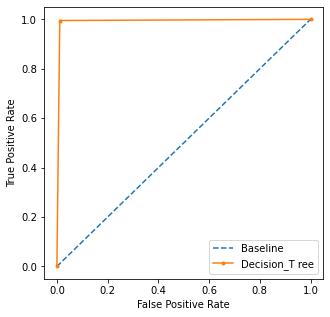

In [51]:
ypred_prob = dtree.predict_proba(x_test)
class1_probs = ypred_prob[:, 1]
plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
fpr, tpr, _ = roc_curve(y_test, class1_probs)
plt.plot(fpr, tpr, marker='.', label='Decision_T ree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Gradient Boosting

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score,\
            f1_score, classification_report, roc_auc_score, roc_curve
gb_model = GradientBoostingClassifier(random_state=2)
gb_model.fit(X_train_new, y_train_new)
gb_test_prediction = gb_model.predict(x_test)
gb_test_accuracy = accuracy_score(y_test, gb_test_prediction)
gb_test_f1_score = f1_score(y_test, gb_test_prediction)

print('Accuracy of Gradient Boosting is', gb_test_accuracy * 100)
print( 'F1 score of Gradient Boosting is',gb_test_f1_score * 100)

Accuracy of Gradient Boosting is 98.36065573770492
F1 score of Gradient Boosting is 98.37802052300563


# XGBoost

In [53]:
xgb_model = XGBClassifier(random_state=2, max_depth=4, eval_metric='logloss')

xgb_model.fit(X_train_new, y_train_new)
xgb_test_prediction = xgb_model.predict(x_test)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_prediction)
xgb_test_f1_score = f1_score(y_test, xgb_test_prediction)
print('Accuracy of XGBoost is ', xgb_test_accuracy * 100)
print('F1 score of XGBoost is ', xgb_test_f1_score * 100)

C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy of XGBoost is  99.16359986617597
F1 score of XGBoost is  99.16971105944869


# ROC/AUC

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
p1 = RandomForest_model.predict_proba(x_test)
p2 = clf.predict_proba(x_test)
p3 = dtree.predict_proba(x_test)
p4 = gb_model.predict_proba(x_test)
p5 = xgb_model.predict_proba(x_test)


In [57]:
auc_score1 = roc_auc_score(y_test, p1[:,1])
auc_score2 = roc_auc_score(y_test, p2[:,1])
auc_score3 = roc_auc_score(y_test, p3[:,1])
auc_score4 = roc_auc_score(y_test, p4[:,1])
auc_score5 = roc_auc_score(y_test, p5[:,1])


print(auc_score1,auc_score2)

0.9986897246474143 0.9774251175285427


In [58]:
fpr1, tpr1, thresh1 = roc_curve(y_test, p1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, p2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, p3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, p4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, p5[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

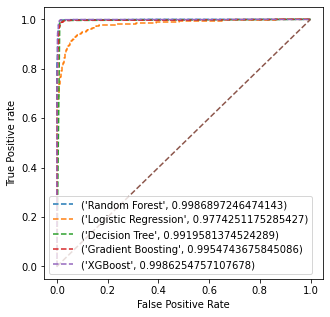

In [59]:
plt.plot(fpr1, tpr1, linestyle='--', label=('Random Forest',auc_score1))
plt.plot(fpr2, tpr2, linestyle='--', label=('Logistic Regression',auc_score2))
plt.plot(fpr3, tpr3, linestyle='--', label=('Decision Tree',auc_score3))
plt.plot(fpr4, tpr4, linestyle='--', label=('Gradient Boosting',auc_score4))
plt.plot(fpr5, tpr5, linestyle='--', label=('XGBoost',auc_score5))

plt.plot(p_fpr, p_tpr, linestyle='--')
plt.title('')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')